# Animals Images Classification

---

[dataset](https://www.kaggle.com/antoreepjana/animals-detection-images-dataset)<br><small> *note: the output was run on GPU mode*

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
np.random.seed(233)

# Define the directory
data_dir = '../input/animals-detection-images-dataset/train'
data_dir

'../input/animals-detection-images-dataset/train'

In [5]:
# Check the sub-folders that show all classes
anml_types = np.array(os.listdir(data_dir))
anml_types

array(['Spider', 'Parrot', 'Scorpion', 'Sea turtle', 'Cattle', 'Fox',
       'Hedgehog', 'Turtle', 'Cheetah', 'Snake', 'Shark', 'Horse',
       'Magpie', 'Hamster', 'Woodpecker', 'Eagle', 'Penguin', 'Butterfly',
       'Lion', 'Otter', 'Raccoon', 'Hippopotamus', 'Bear', 'Chicken',
       'Pig', 'Owl', 'Caterpillar', 'Koala', 'Polar bear', 'Squid',
       'Whale', 'Harbor seal', 'Raven', 'Mouse', 'Tiger', 'Lizard',
       'Ladybug', 'Red panda', 'Kangaroo', 'Starfish', 'Worm', 'Tortoise',
       'Ostrich', 'Goldfish', 'Frog', 'Swan', 'Elephant', 'Sheep',
       'Snail', 'Zebra', 'Moths and butterflies', 'Shrimp', 'Fish',
       'Panda', 'Lynx', 'Duck', 'Jaguar', 'Goose', 'Goat', 'Rabbit',
       'Giraffe', 'Crab', 'Tick', 'Monkey', 'Bull', 'Seahorse',
       'Centipede', 'Mule', 'Rhinoceros', 'Canary', 'Camel', 'Brown bear',
       'Sparrow', 'Squirrel', 'Leopard', 'Jellyfish', 'Crocodile', 'Deer',
       'Turkey', 'Sea lion'], dtype='<U21')

In [18]:
# Count each class number
ty_tmp = []
for abc in anml_types:
    ty_tmp.append(len(os.listdir(data_dir + '/' + abc))-1) # minus the directories folder

cnt_df = pd.DataFrame(anml_types,ty_tmp).reset_index().sort_values(by='index', ascending=False).reset_index(drop=True)
cnt_df.columns = ['counts', 'animal']
cnt_df

,counts,animal
0,1875,Butterfly
1,1429,Moths and butterflies
2,1200,Lizard
3,856,Spider
4,835,Fish
...,...,...
75,45,Red panda
76,30,Shrimp
77,24,Turtle
78,15,Squid


In [34]:
# just using these 48 classes (100-700 image file each)
filter_img = cnt_df[(cnt_df.counts>100) & (cnt_df.counts<700)]
filter_img.counts.sum(),\
filter_img.shape,\
filter_img.animal.unique()

(13247,
 (48, 2),
 array(['Frog', 'Snake', 'Duck', 'Caterpillar', 'Sparrow', 'Jellyfish',
        'Parrot', 'Owl', 'Horse', 'Ladybug', 'Tortoise', 'Chicken',
        'Penguin', 'Snail', 'Squirrel', 'Deer', 'Tiger', 'Crab', 'Shark',
        'Giraffe', 'Goose', 'Whale', 'Starfish', 'Harbor seal',
        'Sea turtle', 'Swan', 'Polar bear', 'Rabbit', 'Rhinoceros', 'Lion',
        'Goat', 'Centipede', 'Pig', 'Sea lion', 'Zebra', 'Woodpecker',
        'Elephant', 'Mouse', 'Fox', 'Ostrich', 'Goldfish', 'Cheetah',
        'Worm', 'Leopard', 'Canary', 'Crocodile', 'Brown bear', 'Raccoon'],
       dtype=object))

# Exploratory Data Analysis

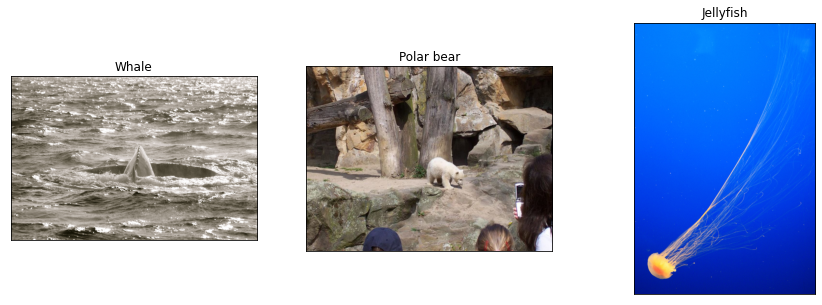

In [36]:
# Sample image from random class
wh_file = os.path.join(data_dir, 'Whale', os.listdir(data_dir + '/Whale')[77])
pb_file = os.path.join(data_dir, 'Polar bear', os.listdir(data_dir+'/Polar bear')[21])
jl_file = os.path.join(data_dir, 'Jellyfish', os.listdir(data_dir+'/Jellyfish')[89])

whale_img = imread(wh_file)
polarb_img = imread(pb_file)
jelly_img = imread(jl_file)

# Then visualize it
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(whale_img)
ax[0].set(title='Whale', xticks=[], yticks=[])

ax[1].imshow(polarb_img)
ax[1].set(title='Polar bear', xticks=[], yticks=[])

ax[2].imshow(jelly_img)
ax[2].set(title='Jellyfish', xticks=[], yticks=[]); # for remove the running info

In [37]:
# Check the image dimension
whale_img.shape, polarb_img.shape, jelly_img.shape

((683, 1024, 3), (768, 1024, 3), (1024, 683, 3))

In [58]:
def cek_all_shape(main_dir = data_dir, the_class = 'animal_name'):
    '''
    Function to check all size (dim1,dim2,dim3) from the images with 2 params:
    * main_dir : main direktori for the sub-folder
    * the_class : class type
    '''
    dim1, dim2 = [], []
    img_file = os.listdir(main_dir + '/' + the_class) 
    img_file.remove('Label') # skip folder
    for img in img_file:
        img1 = imread(main_dir + '/' + the_class +'/'+ img)
        if len(img1.shape) == 3:
            d1,d2,rgb = img1.shape
        else:
            d1,d2 = img1.shape
        dim1.append(d1)
        dim2.append(d2)
    return dim1, dim2

wh_d1, wh_d2 = cek_all_shape(the_class = 'Whale')
pb_d1, pb_d2 = cek_all_shape(the_class = 'Polar bear')
jl_d1, jl_d2 = cek_all_shape(the_class = 'Jellyfish')

706.6585365853658 1004.6864111498257


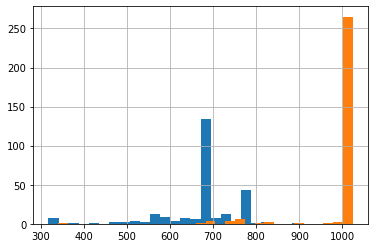

In [60]:
print(np.mean(wh_d1), np.mean(wh_d2))
pd.Series(wh_d1).hist(bins = 30)
pd.Series(wh_d2).hist(bins = 30);

751.8340611353711 994.1397379912664


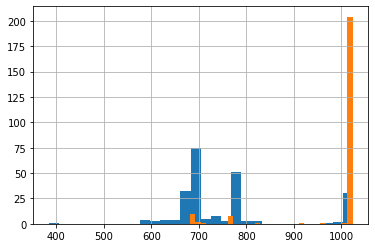

In [61]:
print(np.mean(pb_d1), np.mean(pb_d2))
pd.Series(pb_d1).hist(bins = 30)
pd.Series(pb_d2).hist(bins = 30);

789.9124726477024 965.6608315098468


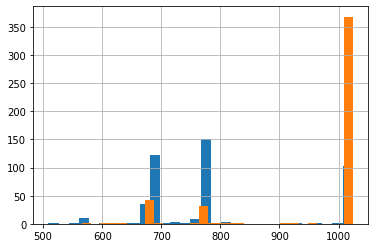

In [62]:
print(np.mean(jl_d1), np.mean(jl_d2))
pd.Series(jl_d1).hist(bins = 30)
pd.Series(jl_d2).hist(bins = 30);

# Data Preprocessing

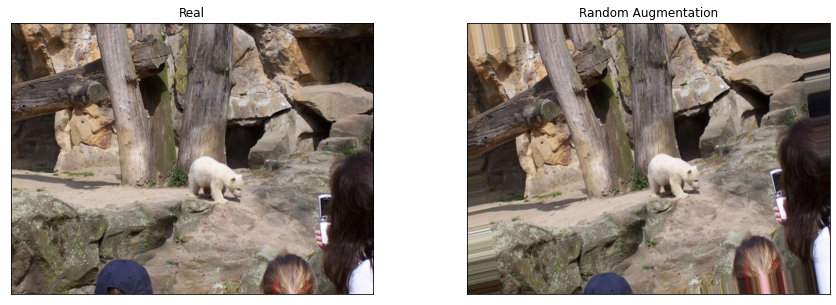

In [67]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(233)

train_gen = ImageDataGenerator(rescale=1/255,
                               rotation_range=35,
                               zoom_range=.1,
                               horizontal_flip=True,
                               validation_split=.2,
                              )

valid_gen = ImageDataGenerator(rescale=1/255,
                               validation_split=.2,
                              )

# Augmentation sample result

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].imshow(polarb_img)
ax[0].set(title='Real', xticks=[], yticks=[])

ax[1].imshow(train_gen.random_transform(polarb_img))
ax[1].set(title='Random Augmentation', xticks=[], yticks=[]);

In [212]:
# File to modelling
IMG_SHAPE = (400,500,3)
BATCH_SIZE = 16
SEED = 233
CLASS_FLT = list(filter_img.animal.values)

train_img_gen = train_gen.flow_from_directory(data_dir,
                                              target_size=IMG_SHAPE[:2],
                                              batch_size=BATCH_SIZE,
                                              seed=SEED,
                                              shuffle=True,
                                              classes=CLASS_FLT,
                                              class_mode='sparse',
                                              subset='training') 

valid_img_gen = valid_gen.flow_from_directory(data_dir, 
                                              target_size=IMG_SHAPE[:2],
                                              batch_size=BATCH_SIZE,
                                              seed=SEED,
                                              shuffle=False,
                                              classes=CLASS_FLT,
                                              class_mode='sparse',
                                              subset='validation')

Found 10619 images belonging to 48 classes.
Found 2628 images belonging to 48 classes.


In [83]:
pd.DataFrame([train_img_gen.class_indices, valid_img_gen.class_indices], ['train', 'valid'])

,Frog,Snake,Duck,Caterpillar,Sparrow,Jellyfish,Parrot,Owl,Horse,Ladybug,...,Fox,Ostrich,Goldfish,Cheetah,Worm,Leopard,Canary,Crocodile,Brown bear,Raccoon
train,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
valid,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47


# Modelling

In [84]:
!pip install tensorflow-addons

In [254]:
import time
import datetime
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.applications import ResNet50V2, InceptionV3
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, ZeroPadding2D
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow_addons.optimizers import AdamW
tf.random.set_seed(233)

SCHEDULE = tf.optimizers.schedules.PiecewiseConstantDecay([1407*20, 1407*30], [1e-3, 1e-4, 1e-5])
step = tf.Variable(0, trainable=False)
schedule = tf.optimizers.schedules.PiecewiseConstantDecay([10000, 15000], [1e-0, 1e-1, 1e-2])
LR = 1e-1 * schedule(step)
WD = lambda: 1e-4 * SCHEDULE(step)
OPTIMIZER = AdamW(learning_rate=SCHEDULE, weight_decay=WD)

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


class custom_callback(Callback):
    total_t0 = 0
    def on_train_begin(self, logs={}):
        self.total_t0 = time.time()
    def on_train_end(self, logs={}):
        print('')
        print('Training complete!')
        print('Total training took {:} (h:mm:ss)'.format(format_time(time.time()-self.total_t0)))
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.92):
            print("\nReached >92% accuracy so stopping training!")
            self.model.stop_training = True
        
def build_model():
    # Transfer Learning with custom output
    base_model = ResNet50V2(input_shape=(202,252,3), include_top=False)
    base_model.trainable = False
#   base_model.layers[5:]
    
    model = Sequential()
    model.add(Input(shape=IMG_SHAPE))
    model.add(ZeroPadding2D())
#     model.add(Dropout(.2))
    model.add(Conv2D(3, 3, padding='same', activation='relu'))
    model.add(ZeroPadding2D())
#     model.add(Dropout(.2))
    model.add(MaxPool2D(2, 2))
    model.add(BatchNormalization())

    model.add(base_model)
    
    model.add(GlobalAveragePooling2D())
#     model.add(Dense(1024,activation='relu'))
#     model.add(Dense(512,activation='relu'))
#     model.add(Dense(256,activation='relu'))
#     model.add(Dense(128,activation='relu'))
#     model.add(Dropout(.2))
#     model.add(Dense(96,activation='relu'))
#     model.add(Dropout(.2))
#     # Output layer
    model.add(Dense(48, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
    return model

callbacks = custom_callback()
stopper = EarlyStopping(patience=74, min_delta=0.05, baseline=0.8,
                        mode='min', monitor='accuracy', 
                        restore_best_weights=True, verbose=1)

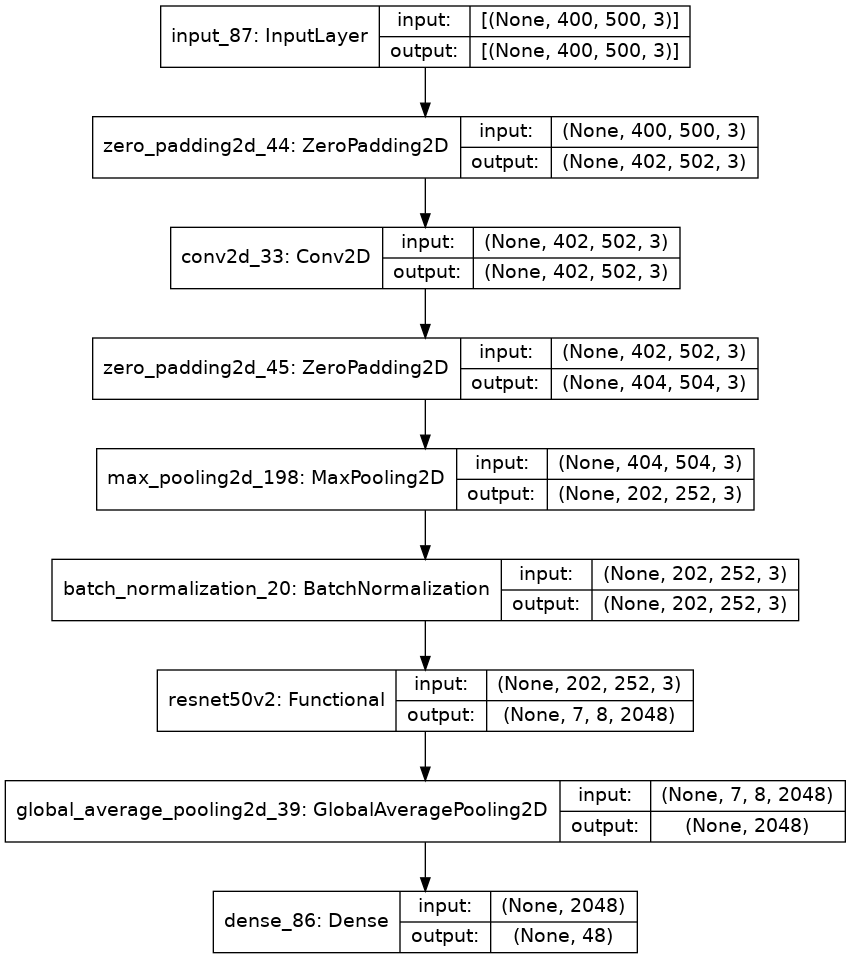

In [251]:
model = build_model()
tf.keras.utils.plot_model(model, show_shapes=True, rankdir='TP')

In [256]:
hist = model.fit(train_img_gen, 
                 epochs=76,
                 steps_per_epoch=5,
                 validation_steps=5,
                 validation_data=valid_img_gen, 
                 callbacks=[stopper, callbacks], 
                 verbose=2)

Epoch 1/76
5/5 - 14s - loss: 3.9709 - accuracy: 0.0625 - val_loss: 2.8062 - val_accuracy: 0.0500
Epoch 2/76
5/5 - 9s - loss: 4.0371 - accuracy: 0.0625 - val_loss: 2.7326 - val_accuracy: 0.2125
Epoch 3/76
5/5 - 9s - loss: 3.5699 - accuracy: 0.1750 - val_loss: 2.3737 - val_accuracy: 0.5625
Epoch 4/76
5/5 - 10s - loss: 3.4842 - accuracy: 0.2125 - val_loss: 1.8788 - val_accuracy: 0.9000
Epoch 5/76
5/5 - 9s - loss: 3.0679 - accuracy: 0.2250 - val_loss: 1.9900 - val_accuracy: 0.8375
Epoch 6/76
5/5 - 9s - loss: 2.7542 - accuracy: 0.3250 - val_loss: 1.9647 - val_accuracy: 0.7875
Epoch 7/76
5/5 - 10s - loss: 2.7129 - accuracy: 0.4375 - val_loss: 1.8259 - val_accuracy: 0.8375
Epoch 8/76
5/5 - 9s - loss: 2.4719 - accuracy: 0.4375 - val_loss: 1.5529 - val_accuracy: 0.9000
Epoch 9/76
5/5 - 9s - loss: 2.4120 - accuracy: 0.4500 - val_loss: 1.5748 - val_accuracy: 0.8625
Epoch 10/76
5/5 - 9s - loss: 2.2419 - accuracy: 0.5500 - val_loss: 1.4409 - val_accuracy: 0.8250
Epoch 11/76
5/5 - 10s - loss: 2.1315

# Evaluation

In [257]:
eval_df = pd.DataFrame(hist.history)
length = len(eval_df)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


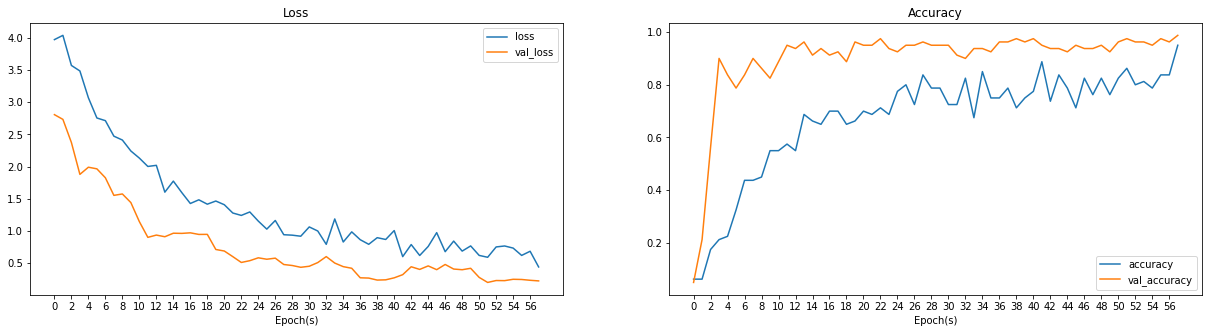

In [259]:
fig, axs = plt.subplots(1, 2, figsize=(21,5))

eval_df[['loss','val_loss']].plot(ax=axs[0])
axs[0].set(title='Loss', xlabel='Epoch(s)', xticks=range(0,length,2))

eval_df[['accuracy','val_accuracy']].plot(ax=axs[1])
axs[1].set(title='Accuracy', xlabel='Epoch(s)', xticks=range(0,length,2));

# Save Model for Deployment

In [260]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with tf.io.gfile.GFile('model_animal.tflite', 'wb') as f:
    f.write(tflite_model)